<a href="https://colab.research.google.com/github/leo-areias/Data_Analysis/blob/main/Projeto-SVM-AulaIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Base dados da Nubank:

link: https://raw.githubusercontent.com/ferreirabruno7/machine_learning/master/advertising.csv

Objetivo é prever se um cliente comprou ou não um produto, usar a coluna: Clicked on Ad

Pense em quais variáveis preditoras podemos usar?



In [ ]:
#importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#importar os dados para o pandas

dados = pd.read_csv("https://raw.githubusercontent.com/ferreirabruno7/machine_learning/master/advertising.csv", sep = ",")

In [ ]:
##visualização das informações sobre as variavéis
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


<Axes: >

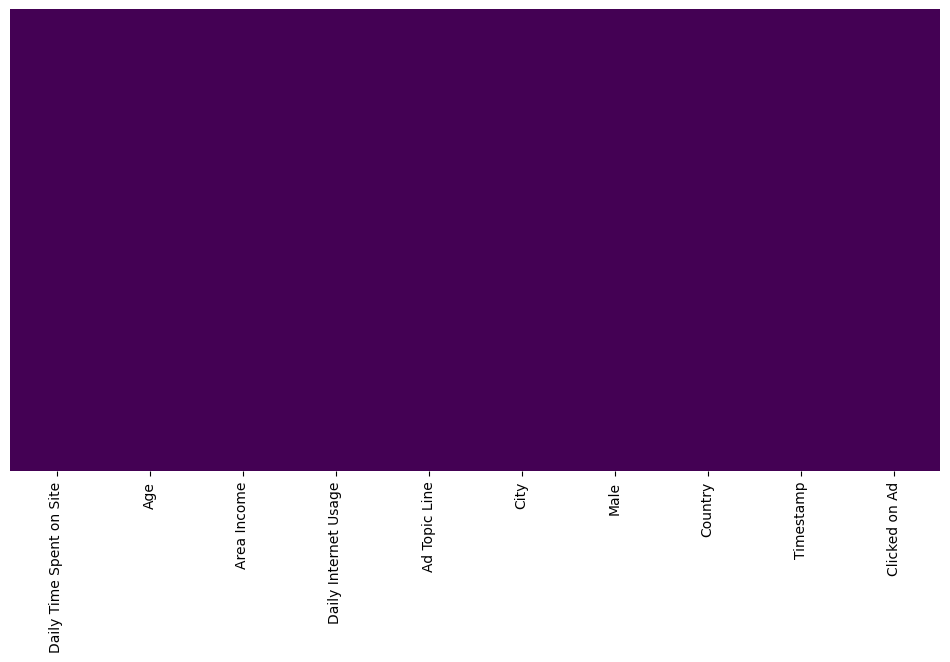

In [ ]:
##visualização dos dados Faltantes
plt.figure(figsize=(12,6))
sns.heatmap(dados.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
dados['Clicked on Ad'].value_counts()


0    500
1    500
Name: Clicked on Ad, dtype: int64

<Axes: xlabel='Clicked on Ad', ylabel='Area Income'>

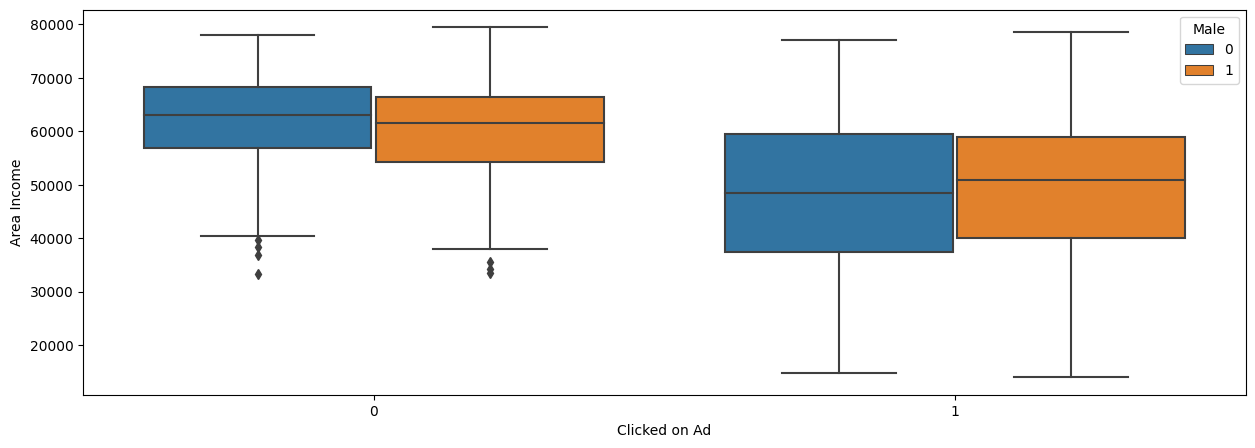

In [ ]:
## risco de clientes indadimplmentes
plt.figure(figsize=(15,5))

sns.boxplot(y='Area Income', x='Clicked on Ad', hue = 'Male', data=dados)

<Figure size 1000x500 with 0 Axes>

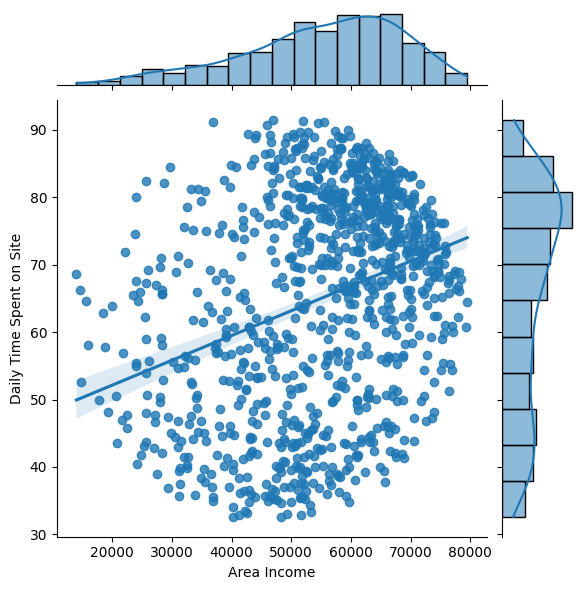

In [ ]:
##valor de renda x empréstimo soliciado ao clientes tomado por clientes inadimplementes
plt.figure(figsize=(10,5))

sns.jointplot(x='Area Income', y='Daily Time Spent on Site', data=dados, kind='reg')

In [ ]:
## Após o tratamento de dados faltantes por mediana seleção de variáveis
X = dados[[
    'Daily Time Spent on Site',
    'Daily Internet Usage'
]]

In [ ]:
## seleção da variável alvo para prever inadimplemncia
y=dados['Clicked on Ad']

In [ ]:
#divisão treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_tran, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [ ]:
# validação importação
from sklearn.model_selection import cross_val_predict


In [ ]:
#importar SVM
from sklearn.svm import SVC

In [ ]:
#chama classe
svn = SVC()

In [ ]:
#fit
svm_credit = SVC()
svm_credit.fit(X_train, y_tran)

SVC()

In [ ]:
previsoes = svm_credit.predict(X_test)
previsoes

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, previsoes)

0.96

In [ ]:
#fit
svm_credit = SVC(kernel='linear', random_state=1, C=2)
svm_credit.fit(X_train, y_tran)

SVC(C=2, kernel='linear', random_state=1)

In [ ]:
previsoes = svm_credit.predict(X_test)
previsoes

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, previsoes)

0.9566666666666667

In [ ]:
#fit
svm_credit2 = SVC(kernel='poly',  C=2)
svm_credit2.fit(X_train, y_tran)

SVC(C=2, kernel='poly')

In [ ]:
previsoes2 = svm_credit2.predict(X_test)
previsoes2

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, previsoes2)

0.96

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.9566666666666667

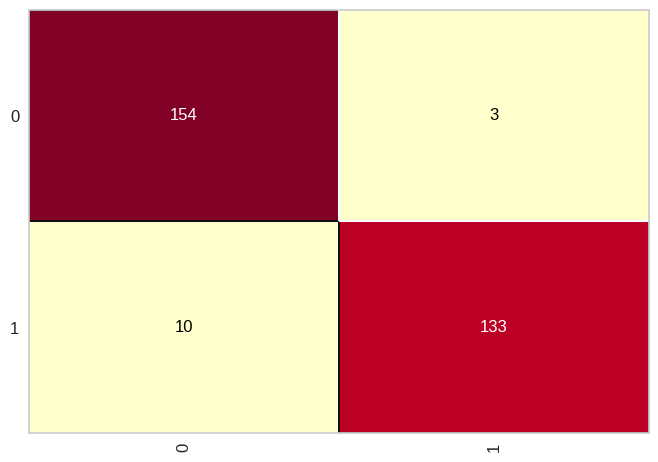

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_credit)
cm.fit(X_train, y_tran)
cm.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       157
           1       0.98      0.93      0.95       143

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [ ]:
def plot_decision_boundary(model, X, y, feature_labels):
    h = .02
    X = X[:, :2]  # Selecionamos apenas as duas primeiras características para a visualização.
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
    plt.xlabel(feature_labels[0])
    plt.ylabel(feature_labels[1])
    plt.legend(handles=scatter.legend_elements()[0], labels=['Not Clicked', 'Clicked'])
    plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


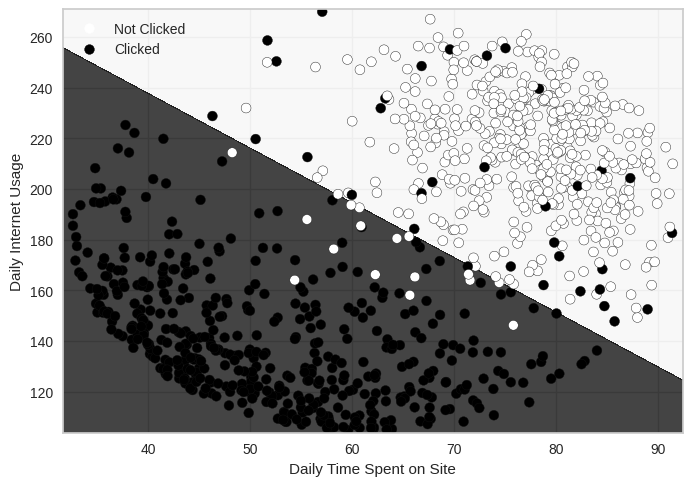

In [ ]:
plot_decision_boundary(svm_credit, X.to_numpy(), y.to_numpy(), ['Daily Time Spent on Site', 'Daily Internet Usage'])


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


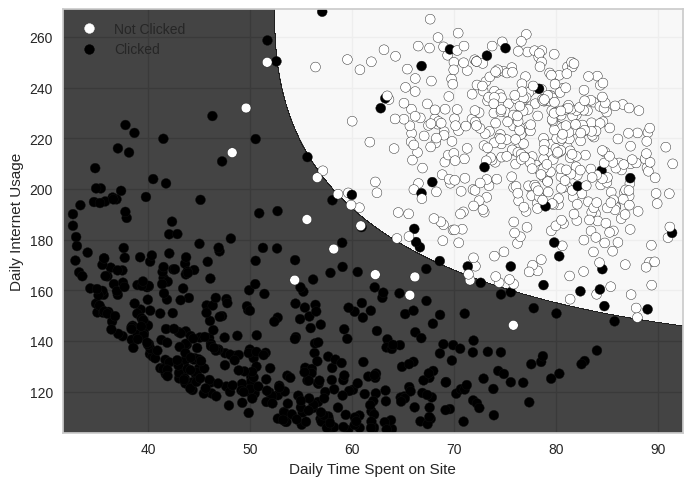

In [ ]:
plot_decision_boundary(svm_credit2, X.to_numpy(), y.to_numpy(), ['Daily Time Spent on Site', 'Daily Internet Usage'])
